# Restaurant Food Recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
# Importing Datasets
df_orders=pd.read_csv('Dataset/orders123.csv',encoding = "latin-1")
df_vendors=pd.read_csv('Dataset/vendors.csv')
df_vendor_nme=pd.read_csv('Dataset/vendor_name.csv')

In [3]:
# Having the important features alone
df_orders=df_orders[['akeed_order_id','customer_id','vendor_rating','vendor_discount_amount','is_rated','deliverydistance','vendor_id','LOCATION_NUMBER','LOCATION_TYPE','Comments']]
df_vendors=df_vendors[['id','vendor_category_en','delivery_charge','serving_distance','prepration_time','discount_percentage','vendor_tag_name']]

In [4]:
df_orders.head()

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments
0,398874.0,V3X3DV0,NaN,0.0,No,6.20,676,2,Home,NaN
1,273763.0,XOE2PGS,NaN,0.0,Yes,2.23,28,0,Home,NaN
2,274627.0,BDJPIJP,NaN,0.0,No,9.14,105,1,Other,NaN
3,245686.0,DV97DJH,0.0,0.0,No,8.63,105,0,Home,NaN
4,224692.0,TVIV80C,0.0,0.0,No,0.00,391,0,NaN,NaN


In [5]:
df_vendors.head()

,id,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name
0,4,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver..."
1,13,Restaurants,0.7,5.0,14,0.0,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa..."
2,20,Restaurants,0.0,8.0,19,0.0,"Breakfast,Desserts,Free Delivery,Indian"
3,23,Restaurants,0.0,5.0,16,0.0,"Burgers,Desserts,Fries,Salads"
4,28,Restaurants,0.7,15.0,10,0.0,Burgers


In [6]:
df_vendor_nme.head()

,vendor_id,vendor_name
0,4,#1 GARDEN CHINESE
1,13,CLANDESTINO CAFE AND BAR
2,20,SUBWAY (SHOPPING PLAZA)
3,23,BANGKOK 2 THAI
4,28,BARISTA VERACE PIZZA & CAFE


In [7]:
df_vendors.rename(columns={'id' : 'vendor_id'}, inplace= True)

In [8]:
df_vendors = pd.merge(df_vendors, df_vendor_nme, on='vendor_id')

In [9]:
df_main = pd.merge(df_orders, df_vendors, on='vendor_id')

In [10]:
df_main.head()

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
0,398874.0,V3X3DV0,NaN,0.0,No,6.20,676,2,Home,NaN,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
1,368990.0,0FNAOSG,NaN,0.0,No,7.58,676,0,NaN,NaN,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
2,369291.0,FVGSKKI,NaN,0.0,No,3.88,676,0,Other,NaN,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
3,405691.0,WAM3HYU,NaN,0.0,No,5.26,676,1,Home,NaN,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
4,301773.0,25OXWCP,3.0,0.0,Yes,3.23,676,0,Home,"Forget downtown overpriced Katz's, or mid-town...",Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS


In [11]:
df_main.shape

(135303, 17)

In [12]:
df_main.isnull().sum()

akeed_order_id                70
customer_id                    0
vendor_rating              87714
vendor_discount_amount         0
is_rated                       0
deliverydistance               0
vendor_id                      0
LOCATION_NUMBER                0
LOCATION_TYPE              48893
Comments                  112999
vendor_category_en             0
delivery_charge                0
serving_distance               0
prepration_time                0
discount_percentage            0
vendor_tag_name             2181
vendor_name                    0
dtype: int64

In [13]:
# As the dataset is huge, let us try filtering and removing NaN values on few features and proceed 
df_main = df_main.dropna(subset=['akeed_order_id', 'vendor_rating','vendor_tag_name','LOCATION_TYPE','Comments'])

In [14]:
df_main.head()

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
4,301773.0,25OXWCP,3.0,0.0,Yes,3.23,676,0,Home,"Forget downtown overpriced Katz's, or mid-town...",Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
27,319248.0,K7EHJ8C,1.0,0.0,Yes,2.83,676,0,Home,The tables outside are also dirty a lot of the...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
70,329396.0,7JR2FGU,3.0,0.0,Yes,13.29,676,0,Home,London was an awesome bartender. Made me feel ...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
74,371988.0,1WX8J8V,4.0,0.0,Yes,4.86,676,0,Home,It was much better than I expected. Everything...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
77,357302.0,06KCWZW,1.0,0.0,Yes,9.19,676,2,Other,"No! I asked for my steak medium-well, but it w...",Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS


In [15]:
print(df_main["vendor_id"].value_counts())

113    1000
78      993
83      888
105     554
85      500
       ... 
216      28
237      24
401      23
907      16
295      13
Name: vendor_id, Length: 97, dtype: int64


There are 97 distinct vendors

In [16]:
df_vendors

,vendor_id,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
0,4,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
1,13,Restaurants,0.7,5.0,14,0.0,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",CLANDESTINO CAFE AND BAR
2,20,Restaurants,0.0,8.0,19,0.0,"Breakfast,Desserts,Free Delivery,Indian",SUBWAY (SHOPPING PLAZA)
3,23,Restaurants,0.0,5.0,16,0.0,"Burgers,Desserts,Fries,Salads",BANGKOK 2 THAI
4,28,Restaurants,0.7,15.0,10,0.0,Burgers,BARISTA VERACE PIZZA & CAFE
...,...,...,...,...,...,...,...,...
95,849,Restaurants,0.0,10.0,10,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",VERMICELLI RESTAURANT
96,855,Restaurants,0.0,8.0,10,0.0,"American,Burgers,Desserts,Free Delivery,Fries,...",AJI 18
97,856,Restaurants,0.0,7.0,10,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",FRIED DUMPLING JIE JIE SHENG
98,858,Restaurants,0.0,3.0,10,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",THE FLYING PUCK


In [17]:
file = open('vendors.pkl', 'wb')

# dump information to that file
pickle.dump(df_vendors, file)

vendors_pkl = open('vendors.pkl','rb')
#pkl_1 = pickle.load(vendors_pkl)

In [18]:
df_main.head(50)

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
4,301773.0,25OXWCP,3.0,0.0,Yes,3.23,676,0,Home,"Forget downtown overpriced Katz's, or mid-town...",Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
27,319248.0,K7EHJ8C,1.0,0.0,Yes,2.83,676,0,Home,The tables outside are also dirty a lot of the...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
70,329396.0,7JR2FGU,3.0,0.0,Yes,13.29,676,0,Home,London was an awesome bartender. Made me feel ...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
74,371988.0,1WX8J8V,4.0,0.0,Yes,4.86,676,0,Home,It was much better than I expected. Everything...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
77,357302.0,06KCWZW,1.0,0.0,Yes,9.19,676,2,Other,"No! I asked for my steak medium-well, but it w...",Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
94,369026.0,NBHQJXI,4.0,0.0,Yes,3.12,676,1,Home,I was pleasantly surprised. This was one of th...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
111,284053.0,QA0WWT8,3.0,0.0,Yes,6.14,676,2,Home,We had a birthday celebration there. The staff...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
117,305304.0,NE1HC73,2.0,0.0,Yes,12.69,676,0,Home,I felt like this place wasn't trying hard enou...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
138,398680.0,7RDT5L5,3.0,0.0,Yes,9.70,676,0,Home,In town for business meetings. Ate here the ...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS
168,310853.0,HZ9Z3LC,4.0,0.0,Yes,3.10,676,1,Home,We've been here several times for breakfast an...,Restaurants,0.7,14.0,10,0.0,"Biryani,Desserts,Indian,Kebabs,Rice",PICARDIAS MEXICANAS


In [19]:
# Sorting the dataframe based on vendor name
df_sorted = df_main.sort_values(by=['vendor_name'], ascending=True)
df_sorted.head(50)

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
87238,195004.0,A702DBA,3.0,0.0,No,9.67,4,0,Home,Venue was not bad but the prices are not affor...,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88709,188940.0,ZAAKXQ9,5.0,0.0,No,9.72,4,0,Work,Out standing food,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88708,177977.0,0IGKHOY,4.0,0.0,No,0.00,4,0,Home,Wonderful ambiance. Good service. Tasty food.,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88697,292863.0,CES70O0,1.0,0.0,Yes,2.68,4,1,Work,Service was slow and not attentive.,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88696,188116.0,SI3GJ8K,4.0,0.0,No,1.64,4,0,Home,Good taste,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88695,193843.0,B28LJKM,5.0,0.0,No,8.74,4,0,Other,Alot,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88694,184229.0,XKMIZRC,5.0,0.0,No,11.11,4,1,Home,They have delicious food yummy in test I love ...,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88690,302768.0,QWB3984,3.0,0.0,Yes,6.34,4,1,Home,This is the first time visiting Magna and was ...,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88689,193263.0,GSTEZF7,5.0,0.0,No,8.76,4,0,Home,Love it,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
88717,190534.0,7I7SY2D,5.0,0.0,No,4.89,4,0,Other,Arabic food,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE


In [20]:
df_sorted['vendor_name']

87238               #1 GARDEN CHINESE
88709               #1 GARDEN CHINESE
88708               #1 GARDEN CHINESE
88697               #1 GARDEN CHINESE
88696               #1 GARDEN CHINESE
                     ...             
73306    ZOIE'S CAFE AND DELICATESSEN
73308    ZOIE'S CAFE AND DELICATESSEN
73311    ZOIE'S CAFE AND DELICATESSEN
73330    ZOIE'S CAFE AND DELICATESSEN
73175    ZOIE'S CAFE AND DELICATESSEN
Name: vendor_name, Length: 15362, dtype: object

In [21]:
# Dropping Duplicates and reseting index
df_sorted=df_sorted.drop_duplicates(subset ="vendor_id",keep = 'first')
df_sorted=df_sorted.reset_index(drop=True)
df_sorted.head()

,akeed_order_id,customer_id,vendor_rating,vendor_discount_amount,is_rated,deliverydistance,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,Comments,vendor_category_en,delivery_charge,serving_distance,prepration_time,discount_percentage,vendor_tag_name,vendor_name
0,195004.0,A702DBA,3.0,0.0,No,9.67,4,0,Home,Venue was not bad but the prices are not affor...,Restaurants,0.0,6.0,15,0.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",#1 GARDEN CHINESE
1,395149.0,UKI91T4,4.0,0.0,Yes,10.36,86,0,Home,I have been here several times before. The dec...,Sweets & Bakes,0.0,15.0,13,0.0,"Cakes,Crepes,Desserts,Donuts,Fresh Juices,Ice ...",ACME BAR & GRILL
2,359806.0,0O33KB0,2.0,0.0,Yes,2.89,855,0,Home,Lame. The service wasn't that good and the wai...,Restaurants,0.0,8.0,10,0.0,"American,Burgers,Desserts,Free Delivery,Fries,...",AJI 18
3,329445.0,WCRWRAN,4.0,0.0,Yes,5.04,578,1,Home,Sooooo good! They have what has to be the bes...,Restaurants,0.7,15.0,10,0.0,"Fresh Juices,Sandwiches,Shawarma",ANTHONY'S PLACE
4,170822.0,E8325MR,1.0,0.0,No,0.00,193,0,Work,Only Nashta is up to standards,Restaurants,0.7,10.0,18,0.0,"Arabic,Burgers,Sandwiches,Shawarma,Grills,Pizz...",ASIAN BOWL


In [22]:
# Getting Distinct Vendor Name and Index after cleaning Data
indices_vendor = pd.Series(df_sorted.index, index=df_sorted['vendor_name']).drop_duplicates()

In [23]:
indices_vendor

vendor_name
#1 GARDEN CHINESE                        0
ACME BAR & GRILL                         1
AJI 18                                   2
ANTHONY'S PLACE                          3
ASIAN BOWL                               4
                                        ..
VERBOTEN                                92
VERMICELLI RESTAURANT                   93
VITO'S ROMA PIZZA                       94
WRAY'S CARIBBEAN AND SEAFOOD CUISINE    95
ZOIE'S CAFE AND DELICATESSEN            96
Length: 97, dtype: int64

In [24]:
file = open('indices_vendor_sorted.pkl', 'wb')

# dump information to that file
pickle.dump(indices_vendor, file)

indices_vendor_pkl = open('indices_vendor_sorted.pkl','rb')
#pkl_2 = pickle.load(indices_vendor_pkl)

In [25]:
df_main.describe()

,akeed_order_id,vendor_rating,vendor_discount_amount,deliverydistance,vendor_id,LOCATION_NUMBER,delivery_charge,serving_distance,prepration_time,discount_percentage
count,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000
mean,214306.133056,3.868962,0.000418,4.566754,185.540034,0.385106,0.383628,12.144643,14.283752,2.349954
std,69071.744400,1.245870,0.026739,4.570583,174.990937,0.843519,0.348392,4.054336,3.906532,9.835297
min,125372.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,5.000000,0.000000
25%,171765.250000,3.000000,0.000000,0.000000,83.000000,0.000000,0.000000,10.000000,11.000000,0.000000
50%,184168.500000,4.000000,0.000000,3.755000,113.000000,0.000000,0.700000,15.000000,15.000000,0.000000
75%,252373.000000,5.000000,0.000000,8.690000,203.000000,0.000000,0.700000,15.000000,15.000000,0.000000
max,415457.000000,5.000000,3.050000,19.360000,907.000000,13.000000,0.700000,15.000000,45.000000,50.000000


## *Need to Perform EDA with Above Dataset*

In [26]:
## Perform EDA and Visualize different variables

In [27]:
rating_count = pd.DataFrame(df_main.groupby('vendor_name')['vendor_rating'].count())
rating_count.sort_values('vendor_rating', ascending=False).head()

,vendor_rating
vendor_name,
STARBUCKS COFFEE (STORE#11650),1000
O'LUNNEY'S TIMES SQUARE PUB,993
CLAW DADDY'S,888
DOS CAMINOS,554
THEATER ROW DINER,500


The vendor with id “STARBUCKS COFFEE (STORE#11650)” received the most rating counts.

In [28]:
# Let's find the average rating of each vendor
avg_rating_vendor = pd.DataFrame(df_main.groupby('vendor_name')['vendor_rating'].mean())
avg_rating_vendor['ratingCount'] = pd.DataFrame(df_main.groupby('vendor_name')['vendor_rating'].count())
avg_rating_vendor.sort_values('ratingCount', ascending=False).head()

,vendor_rating,ratingCount
vendor_name,,
STARBUCKS COFFEE (STORE#11650),4.049000,1000
O'LUNNEY'S TIMES SQUARE PUB,4.097684,993
CLAW DADDY'S,4.129505,888
DOS CAMINOS,3.960289,554
THEATER ROW DINER,4.140000,500


In this data set, the vendor that received the most rating counts was not highly rated at all.

In [29]:
avg_rating_vendor.sort_values('vendor_rating', ascending=False).head()

,vendor_rating,ratingCount
vendor_name,,
VITO'S ROMA PIZZA,4.409836,61
NATUREWORKS,4.250000,228
BRAVO KOSHER PIZZA,4.218750,160
TAQUERIA COATZINGO,4.198347,121
THEATER ROW DINER,4.140000,500


The vendor with id “VITO'S ROMA PIZZA” is the highly rated Vendor.

# Recommendation based on Weighted Average

In [30]:
# https://github.com/krishnaik06/Recommendation_complete_tutorial/blob/master/Average%20Weighted%20Recommendation%20Engines%20using%20Python.ipynb

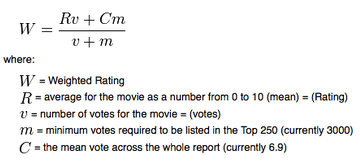

In [31]:
avg_rating_vendor.head()

,vendor_rating,ratingCount
vendor_name,,
#1 GARDEN CHINESE,3.980716,363
ACME BAR & GRILL,3.094737,95
AJI 18,3.041667,48
ANTHONY'S PLACE,3.174419,86
ASIAN BOWL,4.130542,406


In [32]:
# Calculate all the components based on the above formula
v=avg_rating_vendor['ratingCount']
R=avg_rating_vendor['vendor_rating']
C=avg_rating_vendor['vendor_rating'].mean()
m=avg_rating_vendor['ratingCount'].quantile(0.70)

In [33]:
avg_rating_vendor['weighted_average']=((R*v)+ (C*m))/(v+m)

In [34]:
avg_rating_vendor.head()

,vendor_rating,ratingCount,weighted_average
vendor_name,,,
#1 GARDEN CHINESE,3.980716,363,3.876360
ACME BAR & GRILL,3.094737,95,3.436612
AJI 18,3.041667,48,3.501616
ANTHONY'S PLACE,3.174419,86,3.476976
ASIAN BOWL,4.130542,406,3.991760


In [35]:
vendor_ranking=avg_rating_vendor
vendor_ranking.head()

,vendor_rating,ratingCount,weighted_average
vendor_name,,,
#1 GARDEN CHINESE,3.980716,363,3.876360
ACME BAR & GRILL,3.094737,95,3.436612
AJI 18,3.041667,48,3.501616
ANTHONY'S PLACE,3.174419,86,3.476976
ASIAN BOWL,4.130542,406,3.991760


CLAW DADDY'S is the recommended Vendor based on Weighted Average Method

In [37]:
# Rearranging the vendor_sorted_ranking Dataframe
vendor_ranking['vendor_name'] = vendor_ranking.index
vendor_ranking = vendor_ranking[['vendor_name', 'vendor_rating','ratingCount','ratingCount','weighted_average']]
vendor_ranking=vendor_ranking.reset_index(drop=True)

In [38]:
vendor_ranking.head()

,vendor_name,vendor_rating,ratingCount,ratingCount,weighted_average
0,#1 GARDEN CHINESE,3.980716,363,363,3.876360
1,ACME BAR & GRILL,3.094737,95,95,3.436612
2,AJI 18,3.041667,48,48,3.501616
3,ANTHONY'S PLACE,3.174419,86,86,3.476976
4,ASIAN BOWL,4.130542,406,406,3.991760


In [41]:
vendor_ranking['vendor_rating'].iloc[0]

3.9807162534435263

In [42]:
vendor_sorted_ranking=vendor_ranking.sort_values('weighted_average',ascending=False)

In [44]:
file = open('rating_vendor.pkl', 'wb')

# dump information to that file
pickle.dump(vendor_sorted_ranking, file)

rating_vendor_pkl = open('rating_vendor.pkl','rb')
#pkl_8 = pickle.load(rating_vendor_pkl)

Text(0, 0.5, 'Vendor')

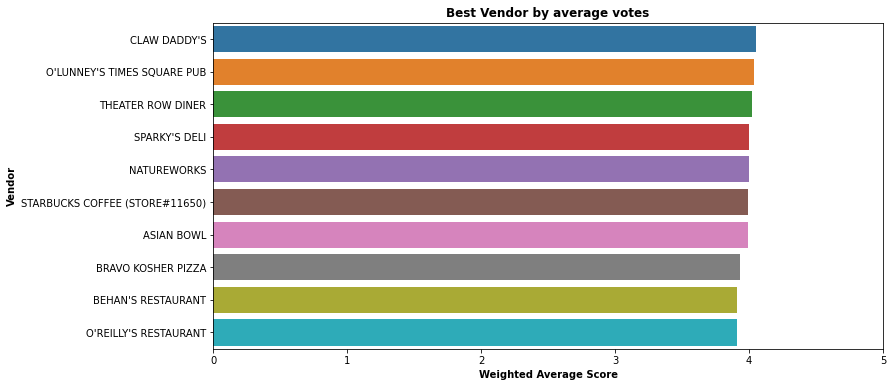

In [45]:
weight_average=vendor_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['vendor_name'].head(10), data=weight_average)
plt.xlim(0,5)
plt.title('Best Vendor by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Vendor', weight='bold')
#plt.savefig('best_vendor.png')

# Recommendation based on Correlation

In [46]:
#Rating matrix
#We convert the ratings table to a 2D matrix. The matrix will be sparse because not every customer rated every vendor.

In [47]:
ratings = df_main[['customer_id', 'vendor_name', 'vendor_rating']]
ratings.head()

,customer_id,vendor_name,vendor_rating
4,25OXWCP,PICARDIAS MEXICANAS,3.0
27,K7EHJ8C,PICARDIAS MEXICANAS,1.0
70,7JR2FGU,PICARDIAS MEXICANAS,3.0
74,1WX8J8V,PICARDIAS MEXICANAS,4.0
77,06KCWZW,PICARDIAS MEXICANAS,1.0


In [48]:
ratings_pivot = ratings.pivot_table(index='customer_id', columns='vendor_name').vendor_rating

In [49]:
cust_id = ratings_pivot.index
vend_id = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(7205, 97)


vendor_name,#1 GARDEN CHINESE,ACME BAR & GRILL,AJI 18,ANTHONY'S PLACE,ASIAN BOWL,BACK TO JOHN'S DELI,BAKE AND THINGS RESTAURANT,BANGKOK 2 THAI,BARISTA VERACE PIZZA & CAFE,BEDOUIN TENT,...,THEATER ROW DINER,THIRD AVENUE ALE HOUSE,TWIN DONUT,TWIN PONDS RESTAURANT,VAN CORTLANDT GOLF COURSE,VERBOTEN,VERMICELLI RESTAURANT,VITO'S ROMA PIZZA,WRAY'S CARIBBEAN AND SEAFOOD CUISINE,ZOIE'S CAFE AND DELICATESSEN
customer_id,,,,,,,,,,,,,,,,,,,,,
00GV4J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01LC14G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01RMLT7,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01XQ398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
026DLQY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
v_ratings = ratings_pivot['ASIAN BOWL']
v_ratings.head()

customer_id
00GV4J4   NaN
01LC14G   NaN
01RMLT7   NaN
01XQ398   NaN
026DLQY   NaN
Name: ASIAN BOWL, dtype: float64

In [51]:

similar_to = ratings_pivot.corrwith(v_ratings)
corr_v = pd.DataFrame(similar_to_v, columns=['pearsonR'])
corr_v.dropna(inplace=True)
corr_summary = corr_v.join(avg_rating_vendor['ratingCount'])
corr_summary.sort_values('pearsonR', ascending=False).head(10)

C:\Users\Adithya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Adithya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
vendor_name,,
ASIAN BOWL,1.000000,406
BACK TO JOHN'S DELI,1.000000,158
OFF BROADWAY DELI & PIZZERIA,1.000000,155
BEDOUIN TENT,1.000000,133
GATSBY'S ON THE BAY,1.000000,119
STARBUCKS COFFEE (STORE #7577),1.000000,292
CURRY LEAVES RESTAURANT,0.924444,179
NEW NO. 1 RESTAURANT,0.870388,91
VERMICELLI RESTAURANT,0.866025,71


The above recommends Movie based on CustomerID's ratings with respect to the choices of customers who has given ratings to the chosen restaturant

# Recommendation based on KNN

In [52]:
from scipy.sparse import csr_matrix
user_rating = df_main.drop_duplicates(['customer_id', 'vendor_name'])
user_rating_pivot = user_rating.pivot(index = 'vendor_name', columns = 'customer_id', values = 'vendor_rating').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [53]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [54]:
file = open('knn.pkl', 'wb')

# dump information to that file
pickle.dump(model_knn, file)

knn_pkl = open('knn.pkl','rb')
#pkl_3 = pickle.load(knn_pkl)

In [55]:
user_rating_pivot.head()

customer_id,00GV4J4,01LC14G,01RMLT7,01XQ398,026DLQY,02REA7X,02Y4HXJ,036OYRE,03E01HL,03I0IGC,...,ZYFTYUQ,ZYKK0KZ,ZYKV0GO,ZYND98F,ZYOOK78,ZZ9EINR,ZZGSX1U,ZZJSJYC,ZZRJABJ,ZZY3N0D
vendor_name,,,,,,,,,,,,,,,,,,,,,
#1 GARDEN CHINESE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACME BAR & GRILL,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AJI 18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANTHONY'S PLACE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASIAN BOWL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# open a file, where you ant to store the data
file = open('user_rtng_pvt.pkl', 'wb')

# dump information to that file
pickle.dump(user_rating_pivot, file)

user_rtng_pvt_pkl = open('user_rtng_pvt.pkl','rb')
#pkl_4 = pickle.load(user_rtng_pvt)

In [84]:
#query_index = np.random.choice(user_rating_pivot.shape[0])
query_index = 16
print(query_index)
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

16


In [85]:
print(distances)
print(indices)

[[0.         0.95114589 0.96749729 0.97441144 0.97511864 0.97600447]]
[[16 67 35 71 77 92]]


In [86]:
user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [87]:
# The below line of code provides the Vendor name based on the query index
user_rating_pivot.index[query_index]

'CAFE R'

In [88]:
def give_recomen(query_index, user_rating_pivot):
    str_new=[]
    for i in range(0, len(distances.flatten())):
        if i == 0:
            str=user_rating_pivot.index[query_index]
        else:
            str1 = user_rating_pivot.index[indices.flatten()[i]]
            str_new.append(str1)
            str2 = distances.flatten()[i]
            str_new.append(str2)
    return str_new

In [89]:
give_recomen(query_index, user_rating_pivot)

['PICARDIAS MEXICANAS',
 0.9511458922034983,
 'FAMILY CHEF RESTAURANT',
 0.9674972893214033,
 'SALUD ES RIQUEZA (HERBAL LIFE)',
 0.9744114435586295,
 'STARBUCKS COFFEE (STORE#11650)',
 0.9751186371005518,
 'VERBOTEN',
 0.9760044687515813]

In [63]:
# for i in range(0, len(distances.flatten())):
#    if i == 0:
#        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
#    else:
#        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

## Content Based Recommendation System

In [64]:
df_vendors.head(1)['vendor_tag_name']

0    Arabic,Breakfast,Burgers,Desserts,Free Deliver...
Name: vendor_tag_name, dtype: object

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1,1),
            stop_words = 'english')

# Filling NaNs with empty string
df_vendors['vendor_tag_name'] = df_vendors['vendor_tag_name'].fillna('')


In [66]:
tfv_matrix = tfv.fit_transform(df_vendors['vendor_tag_name'])
tfv_matrix

<100x47 sparse matrix of type '<class 'numpy.float64'>'
	with 572 stored elements in Compressed Sparse Row format>

In [67]:
tfv_matrix.shape

(100, 47)

In [68]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [69]:
file = open('sigmoid.pkl', 'wb')

# dump information to that file
pickle.dump(sig, file)

sig_1 = open('sigmoid.pkl','rb')
#pkl_5 = pickle.load(sig_1)

In [70]:
sig[0]

array([0.77038599, 0.76302961, 0.76531813, 0.76428554, 0.76351934,
       0.76231567, 0.76323868, 0.76323868, 0.76560129, 0.76487586,
       0.76560129, 0.76265825, 0.76437372, 0.76338365, 0.76564017,
       0.76561763, 0.76655107, 0.7664418 , 0.76386123, 0.76231567,
       0.76188067, 0.76289719, 0.76159416, 0.76366725, 0.76366725,
       0.76366725, 0.76305839, 0.76578428, 0.7634933 , 0.76250172,
       0.76427485, 0.76731612, 0.76475611, 0.76442385, 0.76212732,
       0.76363269, 0.76294301, 0.76321303, 0.76560129, 0.76452215,
       0.76279629, 0.76355404, 0.76355404, 0.76355404, 0.76716548,
       0.76399999, 0.76159416, 0.76435245, 0.76187167, 0.762151  ,
       0.76213531, 0.76453236, 0.76159416, 0.76159416, 0.7641208 ,
       0.76159416, 0.7636902 , 0.76159416, 0.76475296, 0.76243259,
       0.76310276, 0.76243259, 0.76159416, 0.76276335, 0.76233851,
       0.76577927, 0.76199716, 0.76492732, 0.76226987, 0.76199716,
       0.76199716, 0.76420189, 0.76438693, 0.76225551, 0.76159

In [71]:
indices_new = pd.Series(df_vendors.index, index=df_vendors['vendor_name']).drop_duplicates() #Give customer name here

In [72]:
indices_new

vendor_name
#1 GARDEN CHINESE                0
CLANDESTINO CAFE AND BAR         1
SUBWAY (SHOPPING PLAZA)          2
BANGKOK 2 THAI                   3
BARISTA VERACE PIZZA & CAFE      4
                                ..
VERMICELLI RESTAURANT           95
AJI 18                          96
FRIED DUMPLING JIE JIE SHENG    97
THE FLYING PUCK                 98
CHEN'S FOO HAI                  99
Length: 100, dtype: int64

In [73]:
indices_new['SUBWAY STORE 46555']

67

In [83]:
file = open('indices_cbr.pkl', 'wb')

# dump information to that file
pickle.dump(indices_new, file)

indices_cbr_pkl = open('indices_cbr.pkl','rb')
#pkl_6 = pickle.load(indices_cbr_pkl)

In [75]:
sig[49]

array([0.762151  , 0.76291612, 0.76524592, 0.76275184, 0.76159416,
       0.76265801, 0.76159416, 0.76159416, 0.76420503, 0.76547133,
       0.76420503, 0.76226727, 0.76159416, 0.7639057 , 0.76249458,
       0.76232814, 0.76232776, 0.76261067, 0.76159416, 0.76265801,
       0.76201677, 0.76250784, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76345609, 0.76502855, 0.7622167 , 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76803799,
       0.76159416, 0.76159416, 0.7627295 , 0.76420503, 0.76498128,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76227711,
       0.76159416, 0.76159416, 0.76159416, 0.76200351, 0.77038599,
       0.76159416, 0.76740104, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76228459, 0.76159416, 0.76159416, 0.76307467,
       0.76208844, 0.76307467, 0.76159416, 0.76423592, 0.76159416,
       0.76231563, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76336286, 0.76159416, 0.76159

In [76]:
list(enumerate(sig[indices_new['LE BON PAIN']]))

[(0, 0.763667249414027),
 (1, 0.7625736240970961),
 (2, 0.7640889441540698),
 (3, 0.7626293276723335),
 (4, 0.7638893218867117),
 (5, 0.7615941559557649),
 (6, 0.76404608900458),
 (7, 0.76404608900458),
 (8, 0.7615941559557649),
 (9, 0.7624310357177),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7625344157024846),
 (13, 0.7628306179159317),
 (14, 0.7666399694870423),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.762325244489238),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7653172673837958),
 (22, 0.7615941559557649),
 (23, 0.7703859895929454),
 (24, 0.7703859895929454),
 (25, 0.7703859895929454),
 (26, 0.7615941559557649),
 (27, 0.7639401426177792),
 (28, 0.7633580314093448),
 (29, 0.7621495980061541),
 (30, 0.7615941559557649),
 (31, 0.762363137628626),
 (32, 0.7615941559557649),
 (33, 0.7642056170144156),
 (34, 0.7615941559557649),
 (35, 0.7646324556790854),
 (36, 0.7636057840523249),
 (37, 0.7626093489650

In [77]:
def give_rec(title, sig=sig):
    # Get the index corresponding to vendor
    idx = indices_new[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the vendors 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 5 most similar restaurants
    sig_scores = sig_scores[1:2]

    # Vendor indices
    vendor_indices = [i[0] for i in sig_scores]

    # Top 5 most similar vendors
    return df_vendors['vendor_name'].iloc[vendor_indices]

In [2]:
# Testing our content-based recommendation system 
give_rec('CAFE R')

NameError: name 'give_rec' is not defined

# Sentiment Analysis

In [79]:
df_sentiment=df_main[['vendor_rating','Comments']]

In [80]:
df_sentiment.head()

,vendor_rating,Comments
4,3.0,"Forget downtown overpriced Katz's, or mid-town..."
27,1.0,The tables outside are also dirty a lot of the...
70,3.0,London was an awesome bartender. Made me feel ...
74,4.0,It was much better than I expected. Everything...
77,1.0,"No! I asked for my steak medium-well, but it w..."


In [81]:
df_sentiment.shape

(15362, 2)